In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Model, Sequential
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('ecg.csv', header=None)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,...,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,...,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,...,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.461101,0.664659,0.587757,0.701325,0.917205,1.247987,1.505568,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0

In [11]:
x = df.drop(140, axis=1)

In [13]:
y = df[140]

In [15]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,...,0.569083,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,...,0.342785,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,...,0.521296,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.461101,0.664659,0.587757,0.701325,0.917205,1.247987,1.505568,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.17647

In [17]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: 140, Length: 4998, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y)

In [29]:
train_index = y_train[y_train==1].index

In [31]:
train_data = x_train.loc[train_index]

In [33]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
1164,-2.734054,-4.408198,-4.570543,-4.354173,-3.513728,-2.279682,-1.424434,-1.184545,-0.502872,-0.123245,-0.093797,-0.144180,-0.123561,-0.186147,-0.105681,-0.070276,-0.061163,-0.082952,-0.143142,-0.193801,-0.216544,-0.176474,-0.144800,-0.230076,-0.219914,-0.251077,-0.268277,-0.248905,-0.291651,-0.434492,-0.311235,-0.362524,-0.549569,-0.461395,-0.474745,-0.512221,-0.468084,-0.474371,-0.432319,-0.408136,-0.289703,-0.264784,-0.249511,-0.088807,-0.045788,-0.079085,0.031267,0.113134,0.080677,0.167937,0.171869,0.095440,0.048037,0.213974,0.114476,0.248533,0.148365,0.248927,0.214858,0.162523,...,0.496326,0.410829,0.456470,0.407870,0.425570,0.330147,0.386895,0.438326,0.391142,0.316610,0.291896,0.395142,0.360636,0.509730,0.685519,0.753173,1.002150,1.087913,1.211115,1.459753,1.672598,1.826260,1.782518,1.713161,1.493229,1.399957,1.235452,0.991134,0.750938,0.418422,0.059338,-0.126645,-0.238710,-0.150732,-0.186798,-0.352851,-0.199020,-0.203753,-0.306648,-0.186932,-0.231208,-0.235948,-0.188055,-0.300037,-0.251966,-0.212069,-0.185679,-0.039966,0.391261,0.754521,0.718052,0.845447,0.777000,0.670749,0.564881,0.477085,0.828710,0.582895,-0.601307,-3.109099
1711,0.620474,-0.906813,-2.069524,-2.748534,-2.792505,-2.683155,-2.536280,-1.925036,-1.098274,-1.164939,-0.877677,-0.547270,-0.541830,-0.679623,-0.653477,-0.586336,-0.569240,-0.521793,-0.434924,-0.518216,-0.686597,-0.660927,-0.735145,-0.652145,-0.689593,-0.598959,-0.691728,-0.615202,-0.723251,-0.728918,-0.784729,-0.750565,-0.727780,-0.669000,-0.761915,-0.831136,-0.586183,-0.642076,-0.692884,-0.590921,-0.581942,-0.558201,-0.618952,-0.563214,-0.552753,-0.604295,-0.443128,-0.381641,-0.398229,-0.323774,-0.367277,-0.316280,-0.310671,-0.273544,-0.210277,-0.152976,-0.264368,-0.377982,-0.248329,-0.156265,...,-0.193798,-0.322632,-0.289634,-0.215310,-0.312405,-0.234851,-0.298113,-0.287066,-0.001771,-0.143782,-0.201201,-0.290841,-0.219884,-0.074176,-0.055413,0.031251,0.163365,0.216658,0.404151,0.586505,0.709944,0.731894,1.047622,1.383838,1.352681,1.418680,1.162944,1.224819,1.338462,1.234918,1.059440,0.877661,0.662607,0.556780,0.447969,0.413424,0.526970,0.577478,0.612229,0.614342,0.789563,0.916872,0.799189,0.894677,1.030070,1.073985,1.077162,1.128056,1.286756,1.413543,1.661561,1.848050,2.077054,2.514227,2.675276,2.539048,2.333329,2.067037,2.159315,2.179974
776,-0.673716,-3.230805,-4.694783,-5.061991,-4.511230,-3.380822,-1.774557,-1.556254,-0.886216,-0.242300,-0.155040,-0.090264,-0.150550,-0.057495,-0.118857,-0.069728,-0.202706,-0.128045,-0.049621,-0.161071,-0.260795,-0.301704,-0.260390,-0.245309,-0.335141,-0.314429,-0.266501,-0.405401,-0.487303,-0.524722,-0.488112,-0.536518,-0.581560,-0.630580,-0.690767,-0.654979,-0.689832,-0.524954,-0.556278,-0.562498,-0.536098,-0.380219,-0.265824,-0.244302,-0.120077,-0.045491,-0.015020,0.074740,0.073242,0.105983,0.125989,0.107404,0.064933,0.119752,0.128676,0.203813,0.144950,0.088782,0.248864,0.166198,...,0.631847,0.542939,0.630574,0.518364,0.429169,0.534962,0.463246,0.389075,0.398567,0.481712,0.428501,0.420653,0.416954,0.405662,0.427912,0.407393,0.346214,0.490501,0.523636,0.436454,0.593262,0.761924,1.018199,1.183813,1.427558,1.279897,1.088497,0.755207,0.736879,0.692881,0.768241,0.687501,0.388184,0.056716,-0.120519,-0.258556,-0.233787,-0.185873,-0.369897,-0.244218,-0.264838,-0.255850,-0.356141,-0.311492,-0.260280,-0.222607,-0.143373,-0.108924,0.087513,0.760015,1.426282,1.399869,1.425966,1.159556,0.944765,0.554383,0.791491,1.321429,1.119371,-1.403639
1855,0.412635,-0.438259,-2.176187,-3.412496,-4.067832,-4.381196,-3.392371,-2.159953,-1.729624,-1.264368,-0.293316,-0.258803,-0.371021,-0.2

In [35]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
min_max_scaler

MinMaxScaler()

In [39]:
x_train_scale = min_max_scaler.fit_transform(train_data.copy())

In [45]:
x_test_scale = min_max_scaler.transform(x_test.copy())

In [47]:
x_test_scale

array([[0.66935304, 0.68736953, 0.51490941, ..., 0.72108449, 0.74059496,
        0.62071762],
       [0.63151153, 0.56135457, 0.23224345, ..., 0.74578042, 0.70510747,
        0.43440314],
       [0.56990376, 0.59072188, 0.49462814, ..., 0.69090611, 0.65520184,
        0.69534723],
       ...,
       [0.58287942, 0.67015081, 0.55851659, ..., 0.66821856, 0.58427774,
        0.68505291],
       [0.4265236 , 0.29861615, 0.05624417, ..., 0.78937684, 0.807634  ,
        0.57222375],
       [0.54679048, 0.58795846, 0.58733184, ..., 0.28422848, 0.31409961,
        0.51989559]])

In [49]:
from keras.layers import Dense, Dropout, Flatten

In [53]:
class Autoencoder(Model):
    def __init__(self,output_units,code_size=8):
        super().__init__()

        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(code_size, activation='relu')
        ])

        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        encode = self.encoder(inputs)
        decode = self.decoder(encode)
        return decode

In [59]:
model = Autoencoder(output_units=x_train_scale.shape[1])

In [103]:
model.compile(loss='msle', metrics=['accuracy'], optimizer='adam')

In [105]:
history = model.fit(x_train_scale, x_train_scale, batch_size=512, validation_data=(x_test_scale, x_test_scale), epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.1650 - loss: 0.0036 - val_accuracy: 0.0933 - val_loss: 0.0087
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1661 - loss: 0.0034 - val_accuracy: 0.1133 - val_loss: 0.0087
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1660 - loss: 0.0034 - val_accuracy: 0.1133 - val_loss: 0.0087
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1710 - loss: 0.0032 - val_accuracy: 0.1173 - val_loss: 0.0088
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1683 - loss: 0.0031 - val_accuracy: 0.1147 - val_loss: 0.0089
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1603 - loss: 0.0031 - val_accuracy: 0.1160 - val_loss: 0.0089
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1608 - loss: 0.0031 - val_accuracy: 0.1160 - val_loss: 0.0090
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1642 - loss: 0.0030 - val_accuracy: 0.1240 - val_loss: 0.0089

In [107]:
pred1 = model.predict(x_train_scale)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [108]:
pred1_error = keras.losses.msle(pred1, x_train_scale)

In [109]:
pred1_error

<tf.Tensor: shape=(2481,), dtype=float64, numpy=
array([0.00116462, 0.01004505, 0.00171269, ..., 0.00775591, 0.00143124,
       0.00233373])>

In [113]:
threshoold = np.mean(pred1_error.numpy()) + np.std(pred1_error.numpy())

In [115]:
threshoold

0.005511940121614507

In [117]:
pred2 = model.predict(x_test_scale)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [118]:
pred2_error = keras.losses.msle(pred2, x_test_scale)

In [121]:
ana = pd.Series(pred2_error) > threshoold

In [123]:
ana

0       True
1      False
2       True
3      False
4       True
       ...  
745    False
746    False
747    False
748    False
749     True
Length: 750, dtype: bool

In [125]:
pre = np.where(ana, 0.0, 1.0)

In [127]:
pre

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1.

In [129]:
from sklearn.metrics import accuracy_score

In [131]:
acc = accuracy_score(pre, y_test)

In [133]:
acc

0.9413333333333334

In [135]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

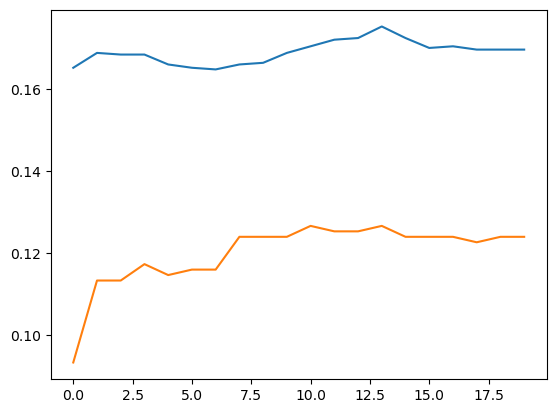

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

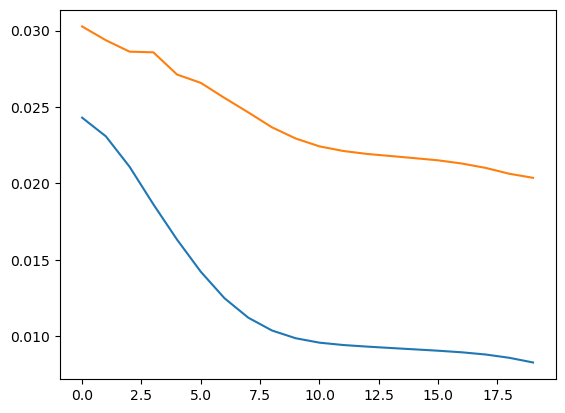

In [101]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.show